In [1]:
# Install statements

# install.packages(c("remotes","pROC","naivebayes"))
# remotes::install_github("jtextor/bayesianNetworks")
# install.packages("bnlearn")
# install.packages("dagitty")
# install.packages("lavaan")

In [ ]:
# Packages

library( bayesianNetworks )
library( naivebayes )
library( bnlearn )
library( dagitty )
library( lavaan )

In [3]:
# Read in the .csv that was created during the preprocessing

df <- read.csv('Datasets/Dataset_Coeff_Estimation.csv')

# Visually inspect the dataframe

head(df)

Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
35-44,0,Professional certificate/ diploma,39,36,42,37,42,-0.21712,-1.18084,6,0,0
25-34,1,Doctorate degree,29,52,55,48,41,-0.71126,-0.21575,6,4,3
35-44,1,Professional certificate/ diploma,31,45,40,32,34,-1.37983,0.40148,6,3,0
18-24,0,Masters degree,34,34,46,47,46,-1.37983,-1.18084,5,2,0
35-44,0,Doctorate degree,43,28,43,41,50,-0.21712,-0.21575,6,3,0
65+,0,Left school at 18,29,38,35,55,52,-1.37983,-1.54858,6,0,0


In [4]:
# After experimentation with and without ordering the class labels,
# We decided to order them because this resulted in more expressive path coefficients

df$Caffeine <- ordered(df$Caffeine, levels =c("0","1","2","3","4","5","6"))
df$Cannabis <- ordered(df$Cannabis, levels =c("0","1","2","3","4","5","6"))
df$Meth <- ordered(df$Meth, levels =c("0","1","2","3","4","5","6"))

# Age and Education have a certain ordinal ordering which we will make use of:

df$Age <- ordered(df$Age, levels =c("18-24","25-34","35-44","45-54","55-64","65+"))
df$Education <- ordered(df$Education, levels=c("Left school before 16","Left school at 16","Left school at 17","Left school at 18","College or university dropout","Professional certificate/ diploma","University degree","Masters degree","Doctorate degree"))

In [5]:
# Inspecting the datatypes present in the dataframe

print("Train dataset specifications:")
str(df)

[1] "Train dataset specifications:"
'data.frame':	1885 obs. of  13 variables:
 $ Age              : Ord.factor w/ 6 levels "18-24"<"25-34"<..: 3 2 3 1 3 6 4 3 3 5 ...
 $ Gender           : int  0 1 1 0 0 0 1 1 0 1 ...
 $ Education        : Ord.factor w/ 9 levels "Left school before 16"<..: 6 9 6 8 9 4 8 2 6 8 ...
 $ Nscore           : num  39 29 31 34 43 29 31 24 42 33 ...
 $ Escore           : num  36 52 45 34 28 38 32 52 55 40 ...
 $ Oscore           : num  42 55 40 46 43 35 43 40 39 36 ...
 $ Ascore           : num  37 48 32 47 41 55 41 41 48 47 ...
 $ Cscore           : num  42 41 34 46 50 52 48 52 49 43 ...
 $ Impulsive        : num  -0.217 -0.711 -1.38 -1.38 -0.217 ...
 $ Sensation_seeking: num  -1.181 -0.216 0.401 -1.181 -0.216 ...
 $ Caffeine         : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 7 7 7 6 7 7 7 7 7 7 ...
 $ Cannabis         : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 1 5 4 3 4 1 2 1 1 2 ...
 $ Meth             : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 1 4 1 1 

In [6]:
# Inspecting the unique values (and their ordinal order if applicable) of all the variables

print("age")
unique(df$Age)
print("gender")
unique(df$Gender)
print("education")
unique(df$Education)
print("Nscore")
unique(df$Nscore)
print("Escore")
unique(df$Escore)
print("Cscore")
unique(df$Cscore)
print("Impulsive")
unique(df$Impulsive)
print("Sensation_seeking")
unique(df$Sensation_seeking)
print("Caffeine")
unique(df$Caffeine)
print("Cannabis")
unique(df$Cannabis)
print("Meth")
unique(df$Meth)

[1] "age"


[1] 35-44 25-34 18-24 65+   45-54 55-64
Levels: 18-24 < 25-34 < 35-44 < 45-54 < 55-64 < 65+

[1] "gender"


[1] 0 1

[1] "education"


[1] Professional certificate/ diploma Doctorate degree                 
[3] Masters degree                    Left school at 18                
[5] Left school at 16                 University degree                
[7] College or university dropout     Left school before 16            
[9] Left school at 17                
9 Levels: Left school before 16 < Left school at 16 < ... < Doctorate degree

[1] "Nscore"


[1] 39 29 31 34 43 24 42 33 26 56 28 27 19 22 41 49 32 25 40 51 35 36 46 44 37
[26] 47 23 30 38 18 45 17 53 50 60 21 54 59 48 20 55 16 57 52 58 14 15 13 12

[1] "Escore"


[1] 36 52 45 34 28 38 32 55 40 41 49 29 31 39 27 43 33 16 44 37 51 42 48 46 47
[26] 35 50 30 26 58 53 54 23 22 24 19 20 21 25 56 59 18

[1] "Cscore"


[1] 42 41 34 46 50 52 48 49 43 53 38 36 59 47 31 30 33 35 51 25 37 45 39 44 27
[26] 40 29 54 55 32 56 20 28 26 22 24 23 19 17 21 57

[1] "Impulsive"


[1] -0.21712 -0.71126 -1.37983  0.19268  0.52975  1.29221  1.86203 -2.55524
 [9]  0.88113  2.90161

[1] "Sensation_seeking"


[1] -1.18084 -0.21575  0.40148 -1.54858  0.07987 -0.52593 -0.84637  1.22470
 [9]  0.76540 -2.07848  1.92173

[1] "Caffeine"


[1] 6 5 4 3 0 1 2
Levels: 0 < 1 < 2 < 3 < 4 < 5 < 6

[1] "Cannabis"


[1] 0 4 3 2 1 6 5
Levels: 0 < 1 < 2 < 3 < 4 < 5 < 6

[1] "Meth"


[1] 0 3 1 6 4 2 5
Levels: 0 < 1 < 2 < 3 < 4 < 5 < 6

In [7]:
# Creating the cor matrix and visually inspecting it

M <- lavCor(df)
M

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
Age,1.00000000,-0.12196667,0.17546243,-0.15046761,-0.02788125,-0.23929895,0.07019570,0.211937645,-0.20496263,-0.35006985,0.142989079,-0.47637466,-0.26129642
Gender,-0.12196667,1.00000000,-0.20129931,-0.07039285,-0.06116698,0.13599424,-0.22038676,-0.183906636,0.16749166,0.24427660,0.010175866,0.30915512,0.24514444
Education,0.17546243,-0.20129931,1.00000000,-0.10283732,0.12035190,0.06496818,0.09246585,0.245952853,-0.13597674,-0.13458276,0.056165131,-0.26896354,-0.22922808
Nscore,-0.15046761,-0.07039285,-0.10283732,1.00000000,-0.43296725,0.01662559,-0.21514520,-0.398678551,0.17722595,0.08466570,0.020492632,0.10900993,0.24810640
Escore,-0.02788125,-0.06116698,0.12035190,-0.43296725,1.00000000,0.23606577,0.15906490,0.318780114,0.10804309,0.20457370,0.044232070,-0.02543117,-0.15833390
Oscore,-0.23929895,0.13599424,0.06496818,0.01662559,0.23606577,1.00000000,0.03280548,-0.059995922,0.27441450,0.41986449,-0.002071750,0.42945186,0.24465898
Ascore,0.07019570,-0.22038676,0.09246585,-0.21514520,0.15906490,0.03280548,1.00000000,0.249608607,-0.23174009,-0.21242041,-0.013683783,-0.16369100,-0.20534460
Cscore,0.21193765,-0.18390664,0.24595285,-0.39867855,0.31878011,-0.05999592,0.24960861,1.000000000,-0.34225017,-0.23258588,-0.004265342,-0.29270898,-0.25711483
Impulsive,-0.20496263,0.16749166,-0.13597674,0.17722595,0.10804309,0.27441450,-0.23174009,-0.342250166,1.00000000,0.62311964,0.028282154,0.32288619,0.25227689
Sensation_seeking,-0.35006985,0.24427660,-0.13458276,0.08466570,0.20457370,0.41986449,-0.21242041,-0.232585875,0.62311964,1.00000000,0.017958549,0.47202827,0.29704230


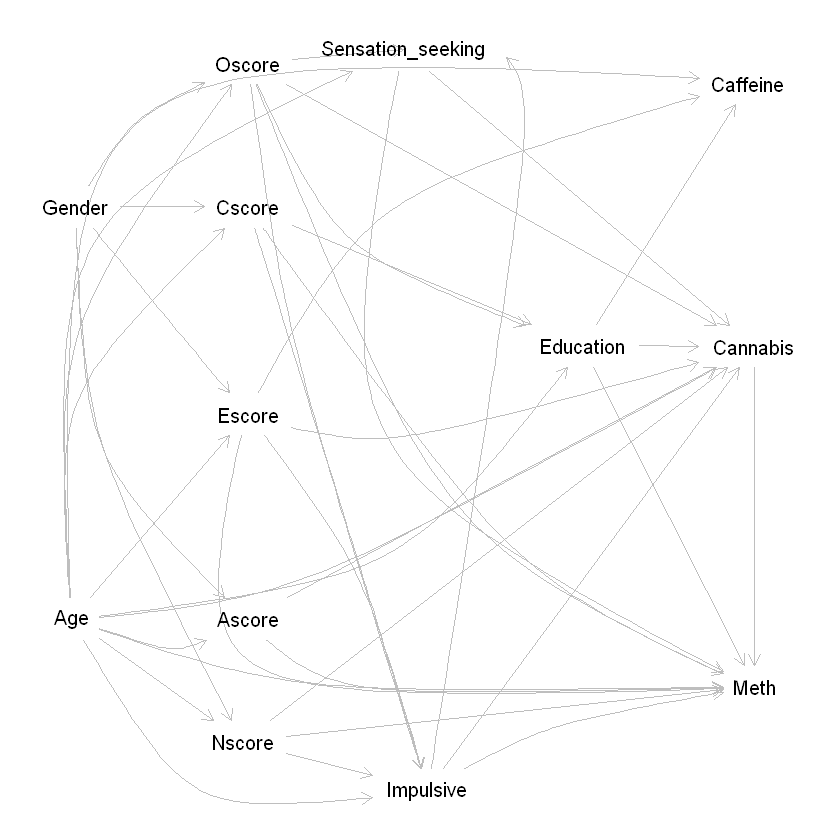

In [8]:
# Creating and plotting the DAG

graph <- dagitty('dag {
bb="0,0,1,1"
Age [pos="0.070,0.753"]
Ascore [pos="0.270,0.753"]
Caffeine [pos="0.839,0.112"]
Cannabis [pos="0.846,0.427"]
Cscore [pos="0.270,0.260"]
Education [pos="0.650,0.426"]
Escore [pos="0.270,0.508"]
Gender [pos="0.074,0.260"]
Impulsive [pos="0.474,0.958"]
Meth [pos="0.846,0.834"]
Nscore [pos="0.264,0.900"]
Oscore [pos="0.270,0.088"]
Sensation_seeking [pos="0.447,0.072"]
Age -> Ascore [pos="0.188,0.797"]
Age -> Caffeine [pos="0.010,0.025"]
Age -> Cannabis [pos="0.311,0.741"]
Age -> Cscore [pos="0.039,0.480"]
Age -> Education [pos="0.458,0.713"]
Age -> Escore
Age -> Impulsive [pos="0.196,0.999"]
Age -> Meth [pos="0.302,0.847"]
Age -> Nscore
Age -> Oscore [pos="0.036,0.406"]
Age -> Sensation_seeking [pos="0.024,0.257"]
Ascore -> Cannabis
Ascore -> Meth [pos="0.350,0.851"]
Cannabis -> Meth
Cscore -> Education
Cscore -> Impulsive [pos="0.420,0.769"]
Cscore -> Meth [pos="0.577,0.720"]
Education -> Caffeine
Education -> Cannabis
Education -> Meth
Escore -> Caffeine [pos="0.393,0.237"]
Escore -> Cannabis [pos="0.416,0.556"]
Escore -> Impulsive [pos="0.404,0.691"]
Escore -> Meth [pos="0.158,0.875"]
Gender -> Ascore [pos="0.077,0.567"]
Gender -> Cscore
Gender -> Escore [pos="0.199,0.421"]
Gender -> Nscore [pos="0.077,0.534"]
Gender -> Oscore [pos="0.137,0.151"]
Impulsive -> Cannabis
Impulsive -> Meth [pos="0.603,0.879"]
Impulsive -> Sensation_seeking [pos="0.609,0.085"]
Nscore -> Cannabis
Nscore -> Impulsive
Nscore -> Meth
Oscore -> Cannabis
Oscore -> Education [pos="0.364,0.319"]
Oscore -> Impulsive [pos="0.305,0.395"]
Oscore -> Meth [pos="0.480,0.679"]
Oscore -> Sensation_seeking
Sensation_seeking -> Cannabis
Sensation_seeking -> Meth [pos="0.329,0.574"]
}
')
plot(graph)

In [9]:
# Inspecting the implied conditional independencies

impliedConditionalIndependencies(graph)

Age _||_ Gndr
Ascr _||_ Cffn | Age, Edct, Escr
Ascr _||_ Cffn | Age, Cscr, Escr, Oscr
Ascr _||_ Cffn | Age, Gndr
Ascr _||_ Cscr | Age, Gndr
Ascr _||_ Edct | Age, Cscr, Oscr
Ascr _||_ Edct | Age, Gndr
Ascr _||_ Escr | Age, Gndr
Ascr _||_ Impl | Age, Cscr, Escr, Nscr, Oscr
Ascr _||_ Impl | Age, Gndr
Ascr _||_ Nscr | Age, Gndr
Ascr _||_ Oscr | Age, Gndr
Ascr _||_ Sns_ | Age, Impl, Oscr
Ascr _||_ Sns_ | Age, Cscr, Escr, Nscr, Oscr
Ascr _||_ Sns_ | Age, Gndr
Cffn _||_ Cnnb | Age, Edct, Escr
Cffn _||_ Cscr | Age, Edct, Gndr
Cffn _||_ Cscr | Age, Edct, Escr
Cffn _||_ Gndr | Age, Cscr, Escr, Oscr
Cffn _||_ Gndr | Age, Edct, Escr
Cffn _||_ Impl | Age, Cscr, Escr, Oscr
Cffn _||_ Impl | Age, Edct, Escr
Cffn _||_ Meth | Age, Edct, Escr
Cffn _||_ Nscr | Age, Gndr
Cffn _||_ Nscr | Age, Cscr, Escr, Oscr
Cffn _||_ Nscr | Age, Edct, Escr
Cffn _||_ Oscr | Age, Edct, Gndr
Cffn _||_ Oscr | Age, Edct, Escr
Cffn _||_ Sns_ | Age, Impl, Oscr
Cffn _||_ Sns_ | Age, Cscr, Escr, Oscr
Cffn _||_ Sns_ | Age, Edct, E

In [10]:
# Inspecting the test statistics of the implied conditional independencies

localTests( graph, sample.cov=M, sample.nobs=nrow(df) )

,estimate,p.value,2.5%,97.5%
Age _||_ Gndr,-0.121966672,1.051249e-07,-0.1662084680,-0.07724375
"Ascr _||_ Cffn | Age, Edct, Escr",-0.034055052,1.397373e-01,-0.0791179535,0.01114654
"Ascr _||_ Cffn | Age, Cscr, Escr, Oscr",-0.022356707,3.325405e-01,-0.0674850607,0.02286284
"Ascr _||_ Cffn | Age, Gndr",-0.018446250,4.237681e-01,-0.0635657874,0.02674848
"Ascr _||_ Cscr | Age, Gndr",0.213656236,5.015096e-21,0.1701353433,0.25643004
"Ascr _||_ Edct | Age, Cscr, Oscr",0.024756209,2.831198e-01,-0.0204511059,0.06986261
"Ascr _||_ Edct | Age, Gndr",0.043976820,5.638862e-02,-0.0011979956,0.08897288
"Ascr _||_ Escr | Age, Gndr",0.151378259,3.729570e-11,0.1069380088,0.19523494
"Ascr _||_ Impl | Age, Cscr, Escr, Nscr, Oscr",-0.186553566,2.883969e-16,-0.2298672890,-0.14255126
"Ascr _||_ Impl | Age, Gndr",-0.197908321,3.442638e-18,-0.2409820980,-0.15411950


In [11]:
# Extracting the coordinates

cg <- coordinates(graph)

# Fitting the graph with training data and our cov matrix

fit <- lavaan( toString(graph,"lavaan"), sample.cov=M, sample.nobs=nrow(df),estimator="ML",auto.var=TRUE) # Estimating using maximum likelihood

# Summary of the fit

summary(fit)

lavaan 0.6-7 ended normally after 20 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         53
                                                      
  Number of observations                          1885
                                                      
Model Test User Model:
                                                      
  Test statistic                              1503.638
  Degrees of freedom                                35
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                      Estimate  Std.Err  z-value  P(>|z|)
  Ascore ~                                               
    Age                  0.044    0.023    1.944    0.052
  

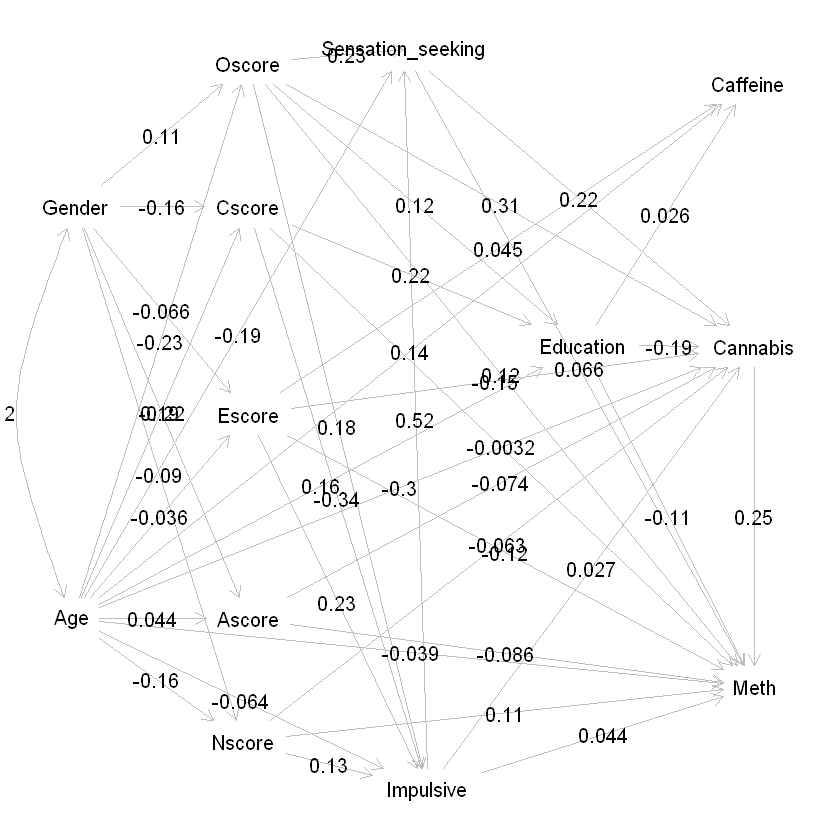

In [12]:
# Estimating the path coefficients

fg <- lavaanToGraph(fit, digits=2)
coordinates(fg) <- cg

# Plotting the graph with the estimated coefficients

plot(fg, show.coefficients=TRUE)